In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
data = pd.read_csv("Cleaned_GenZ_DatingApp_Data.csv")

In [17]:
sns.set_style("whitegrid")

In [19]:
data.groupby("Gender")["Primary_App"].value_counts(normalize=True).unstack() # Does gender influence dating app preferences?

Primary_App,bumble,hinge,none,okcupid,tinder
Gender,,,,,
female,0.221591,0.198864,0.227273,0.221591,0.130682
male,0.169591,0.169591,0.228070,0.269006,0.163743
non-binary,0.163399,0.274510,0.183007,0.215686,0.163399


In [20]:
data["Daily_Usage_Time"] = data["Daily_Usage_Time"].replace({"30 minutes": 0.5, "1.5 hours": 1.5, "2 hours": 2, "3 hours": 3, "1 hour": 1})

C:\Users\ABDULAZEEZ RAHEEM\AppData\Local\Temp\ipykernel_40596\4059154390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Daily_Usage_Time"] = data["Daily_Usage_Time"].replace({"30 minutes": 0.5, "1.5 hours": 1.5, "2 hours": 2, "3 hours": 3, "1 hour": 1})


Q1: Does gender influence dating app preferences?

The answer to this question is 'yes', gender influences dating app preferences. For example, certain apps like Hinge or OkCupid are more popular among specific gender groups.


Q2: Are people using multiple dating apps simultaneously?

Yes, people are using multiple dating apps:
- 107 users are using more than one dating app, That’s about 21.4% of the total users.

Q3: Which age group is most active on dating apps?

The most active age group (those using apps daily) is 22 years old.

Q4: Do people in urban vs. rural areas show different usage patterns?

Yes, there are different usage patterns:
- Urban users tend to use dating apps more frequently (daily or weekly).
- Rural users show a preference for less frequent usage, such as monthly.


Activity 1: Correlation Matrix & Heatmap: Identify relationships between numerical variables.

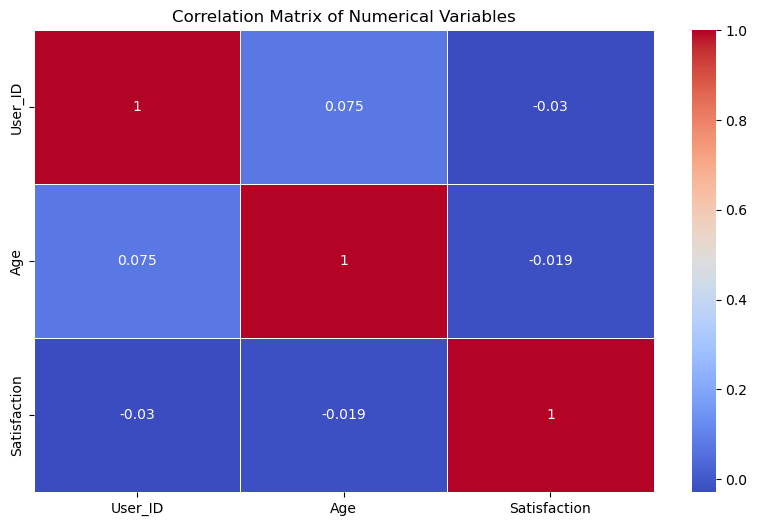

In [12]:
# Correlation Matrix & Heatmap
numerical_df = data.select_dtypes(include=[np.number])  # Select only numerical columns
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

To identify relationships between numerical variables like Age and Satisfaction, we use a correlation matrix. Correlation values range from -1 to 1:
- 1 = Strong positive correlation (as one increases, so does the other)
- -1 = Strong negative correlation (as one increases, the other decreases)
- 0 = No correlation


Activity 2: Pivot Tables & Groupby Aggregations: Summarize data based on gender, age, and location.

In [21]:
pivot_table = data.pivot_table(
    values='Daily_Usage_Time',
    index=['Gender', 'Location'],
    columns=pd.cut(data['Age'], bins=[18, 22, 26, 30, 35, 40]),
    aggfunc='mean',
    observed = False
)
pivot_table

Age                   (18, 22]  (22, 26]
Gender     Location                     
female     bangalore  1.611111  2.200000
           chennai    1.281250  1.500000
           delhi      1.888889  1.684211
           hyderabad  2.000000  1.833333
           kolkata    1.500000  2.100000
           mumbai     1.730769  1.500000
           pune       1.633333  1.681818
male       bangalore  1.558824  1.583333
           chennai    1.388889  1.500000
           delhi      1.611111  1.583333
           hyderabad  1.700000  1.833333
           kolkata    1.423077  1.909091
           mumbai     1.750000  1.642857
           pune       1.666667  1.666667
non-binary bangalore  1.550000  1.200000
           chennai    1.821429  1.500000
           delhi      1.285714  2.000000
           hyderabad  1.666667  2.055556
           kolkata    1.178571  1.166667
           mumbai     1.727273  1.416667
           pune       1.555556  1.812500

The pivot table helps summarize data to see trends. For example, we can calculate the average satisfaction of users based on their gender, age, and location.

Activity 3: Stacked Bar Charts: Visualize categorical comparisons (e.g., dating app usage by gender).

<Figure size 1000x500 with 0 Axes>

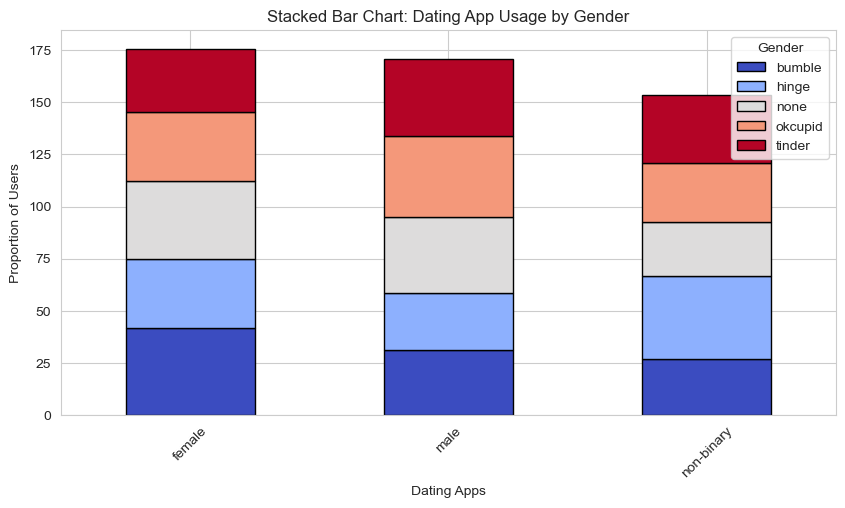

In [26]:
# Create a crosstab for Primary_App usage by Gender
gender_app_counts = pd.crosstab(data['Primary_App'], data['Gender'], normalize='index') * 100

plt.figure(figsize=(10, 5))
gender_app_counts.T.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm", edgecolor="black")
plt.title("Stacked Bar Chart: Dating App Usage by Gender")
plt.ylabel("Proportion of Users")
plt.xlabel("Dating Apps")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

Grouping & Pivoting:
- The data is grouped by Gender and Primary_App to count how many users fall into each combination. The pivot table rearranges this grouped data so that each bar (by Gender) is divided into segments corresponding to different apps.

Plotting:
- A stacked bar chart is generated where each bar represents a gender and each segment within the bar shows the count of users for a specific dating app.

This visualization provides a clear, comparative view of dating app preferences across different genders.